###Stroke Prediction

**Objective:** The goal of this exercise is to apply the deep learning concepts. By the end of this exercise, we would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries

In [1]:
import numpy as np
import pandas as pd


#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/ML Final Project /Neural Network/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First thing we need to know the shape of our data (How many examples and features do we have)

In [4]:
data.shape

(5110, 12)

###Types of different Columns

We see the type of each feature.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Dealing with categorical variables

Now we will walk through the categorical varianles that we have to see the categories and the counts of each of them.

In [6]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [7]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [8]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [10]:
data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [11]:
data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [12]:
data ['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#Preprocessing

###Dealing with Nulls

The bmi column contains nulls, so we fill the nulls with the mean value.

In [13]:
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

####Encoding Categorical Features

Here we will encode those categorical variables to be able to use them to train our DL model.

In [14]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['gender'] = encoder.fit_transform(data['gender'])

###Normalizing Features

Now we normalize the input data by dividing with the max value of each column.

In [15]:
data = data.divide(data.max(axis=0))

data.describe()

id       gender          age  hypertension  heart_disease  \
count  5110.000000  5110.000000  5110.000000   5110.000000    5110.000000   
mean      0.500656     0.207143     0.527154      0.097456       0.054012   
std       0.290125     0.246522     0.275764      0.296607       0.226063   
min       0.000919     0.000000     0.000976      0.000000       0.000000   
25%       0.243231     0.000000     0.304878      0.000000       0.000000   
50%       0.506334     0.000000     0.548780      0.000000       0.000000   
75%       0.749685     0.500000     0.743902      0.000000       0.000000   
max       1.000000     1.000000     1.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   5110.000000  5110.000000     5110.000000        5110.000000   
mean       0.656164     0.541928        0.508023           0.390622   
std        0.475034     0.272573        0.499985           0.166643   
min        0.000000     0.000000        0.000000           0.202841   
25%        0.000000     0.500000        0.000000           0.284261   
50%        1.000000     0.500000        1.000000           0.338136   
75%        1.000000     0.750000        1.000000           0.419850   
max        1.000000     1.000000        1.000000           1.000000   

               bmi  smoking_status       stroke  
count  5110.000000     5110.000000  5110.000000  
mean      0.296037        0.458969     0.048728  
std       0.078873        0.357178     0.215320  
min       0.105533        0.000000     0.000000  
25%       0.243852        0.000000     0.000000  
50%       0.290984        0.666667     0.000000  
75%       0.336066        0.666667     0.000000  
max       1.000000        1.000000     1.000000

###Removing Unnecessary Features

From the features that we have, we can remove the ID feature because it's irrelevant to our predictions.

In [16]:
data = data.drop('id', axis=1)

#Building the DL Model

Now it's time to build the actual model, and observe a summary of it.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-trainabl

###Compiling the model

Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

###Fitting the data

We take the first columns as features and the last column as a label, then we split our dataset between training and testing, and we fit the model on training data, and validate on the testing data. The training happens for 15 epochs.

In [19]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
112/112 [==============================] - 2s 8ms/step - loss: 0.6691 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6448 - val_accuracy: 0.9537 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6005 - val_accuracy: 0.9537 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5605 - val_accuracy: 0.9537 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.9502 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5242 - val_accuracy: 0.9537 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [====================

We have a precision and a recall so close to zero, which means the model is not predicting any positive value, so we need to improve it.

#Improving DL Models

###Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

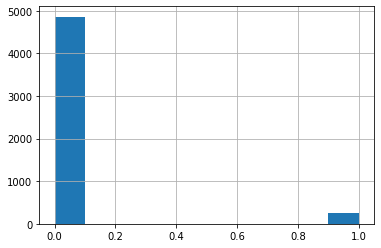

In [20]:
data['stroke'].hist()

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4861.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

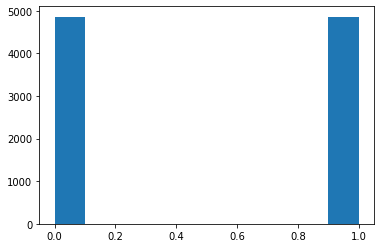

In [21]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
over = SMOTE()
x_new, y_new = over.fit_resample(x, y)

plt.hist(y_new)

Now we will fit our same model on the new data that we have.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
213/213 [==============================] - 1s 3ms/step - loss: 0.8716 - accuracy: 0.5008 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.8458 - val_accuracy: 0.4981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
213/213 [==============================] - 1s 3ms/step - loss: 0.8192 - accuracy: 0.5008 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.8003 - val_accuracy: 0.4981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
213/213 [==============================] - 1s 3ms/step - loss: 0.7806 - accuracy: 0.5008 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7670 - val_accuracy: 0.4981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
213/213 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.5008 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7426 - val_accuracy: 0.4981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
213/213 [====================

We see that the performance gets better when our data became balanced.
Now we will try improving our model with other techniques 

###Model Design

We will introduce batch normalization after each layer.

In [23]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Batc  (None, 8)               

Let's train the model

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
213/213 [==============================] - 3s 6ms/step - loss: 0.6198 - accuracy: 0.6971 - precision_1: 0.6780 - recall_1: 0.7489 - val_loss: 0.6298 - val_accuracy: 0.6812 - val_precision_1: 0.6251 - val_recall_1: 0.9112
Epoch 2/15
213/213 [==============================] - 1s 4ms/step - loss: 0.5225 - accuracy: 0.7663 - precision_1: 0.7346 - recall_1: 0.8328 - val_loss: 0.4955 - val_accuracy: 0.7772 - val_precision_1: 0.7297 - val_recall_1: 0.8832
Epoch 3/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4882 - accuracy: 0.7709 - precision_1: 0.7398 - recall_1: 0.8346 - val_loss: 0.4436 - val_accuracy: 0.8029 - val_precision_1: 0.7808 - val_recall_1: 0.8443
Epoch 4/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7788 - precision_1: 0.7478 - recall_1: 0.8404 - val_loss: 0.4281 - val_accuracy: 0.8063 - val_precision_1: 0.7858 - val_recall_1: 0.8443
Epoch 5/15
213/213 [==============================] - 1s 5ms/step - loss

We see that we are achieving better metrics with batch normalization.

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model.

We start by wrapping our model inside a kerasClassifier to be able to use it in Scikit Learn

In [25]:
def create_model():

  model = Sequential()

  model.add(Dense(32, input_dim=10, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(16, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(8, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(2, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  return model 

from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


We will tune the batch size and the number of epochs.

In [26]:
from sklearn.model_selection import GridSearchCV

params = {'batch_size': [50, 100],
          'epochs': [50, 100]}


grid = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=3)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/50
91/91 [==============================] - 2s 3ms/step - loss: 0.5791 - accuracy: 0.6993 - precision_2: 0.6731 - recall_2: 0.7822
Epoch 2/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.7731 - precision_2: 0.7444 - recall_2: 0.8361
Epoch 3/50
91/91 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7795 - precision_2: 0.7510 - recall_2: 0.8405
Epoch 4/50
91/91 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.7866 - precision_2: 0.7556 - recall_2: 0.8510
Epoch 5/50
91/91 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.7983 - precision_2: 0.7735 - recall_2: 0.8471
Epoch 6/50
91/91 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7963 - precision_2: 0.7701 - recall_2: 0.8484
Epoch 7/50
91/91 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8007 - precis

In [27]:
best_parameters = grid.best_params_
print(best_parameters)
best_score = grid.best_score_
print(best_score)

{'batch_size': 100, 'epochs': 100}
0.8574588696161906


Fitting to the model on the best hyperparameters we obtained.

In [28]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, batch_size=50)

Epoch 1/100
137/137 [==============================] - 4s 8ms/step - loss: 0.6089 - accuracy: 0.6896 - precision_15: 0.6625 - recall_15: 0.7710 - val_loss: 0.6234 - val_accuracy: 0.6805 - val_precision_15: 0.7305 - val_recall_15: 0.5758
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 0.4921 - accuracy: 0.7675 - precision_15: 0.7298 - recall_15: 0.8484 - val_loss: 0.5258 - val_accuracy: 0.7604 - val_precision_15: 0.7192 - val_recall_15: 0.8572
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 0.4722 - accuracy: 0.7762 - precision_15: 0.7365 - recall_15: 0.8590 - val_loss: 0.4638 - val_accuracy: 0.7748 - val_precision_15: 0.7123 - val_recall_15: 0.9249
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 0.4627 - accuracy: 0.7834 - precision_15: 0.7447 - recall_15: 0.8613 - val_loss: 0.4447 - val_accuracy: 0.7830 - val_precision_15: 0.7259 - val_recall_15: 0.9119
Epoch 5/100
137/137 [==============================]

We achieved high accuracy on the test set which is a great result.



